# Lab-8: Cluster Analysis

# Grouping objects by similarity using k-means



# K-means clustering using scikit-learn

In [ ]:
from sklearn.datasets import make_blobs   # make_blobs is a synthetic data generator, especially useful for clustering and classification algorithms


X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

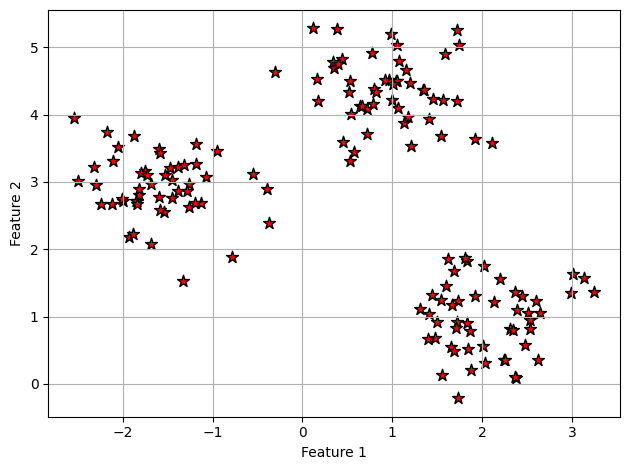

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(X[:, 0], X[:, 1],
            c='red', marker='*', edgecolor='black', s=80)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

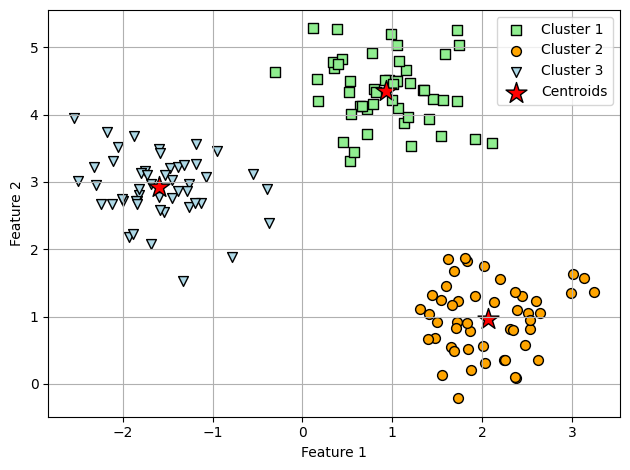

In [ ]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('figures/10_02.png', dpi=300)
plt.show()

## Using the elbow method to find the optimal number of clusters

In [ ]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


Distortion: 713.70
Distortion: 283.46
Distortion: 72.48
Distortion: 62.84
Distortion: 53.87
Distortion: 47.04
Distortion: 40.09
Distortion: 34.92
Distortion: 30.25
Distortion: 27.26


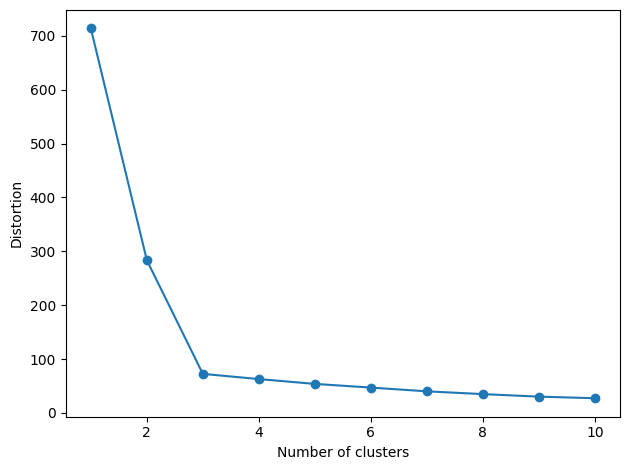

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                #init='random',
                n_init=20,
                max_iter=300,
                random_state=0)
    km.fit(X)
    print(f'Distortion: {km.inertia_:.2f}')   #Run to see distorion
    distortions.append(km.inertia_)


plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# Organizing clusters as a hierarchical tree

# Grouping clusters in bottom-up fashion

In [ ]:
import pandas as pd
import numpy as np


np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


# Performing hierarchical clustering on a distance matrix

In [ ]:
from scipy.spatial.distance import pdist, squareform


row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [ ]:
#linkage function - let's take a careful look at the function documentations.

from scipy.cluster.hierarchy import linkage

help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [ ]:
# 1. incorrect approach: Squareform distance matrix

from scipy.cluster.hierarchy import linkage


row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

<ipython-input-85-481a9360ad38>:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist, method='complete', metric='euclidean')


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [ ]:
# 2. correct approach: Condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
            index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [ ]:
# 3. correct approach: Input matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


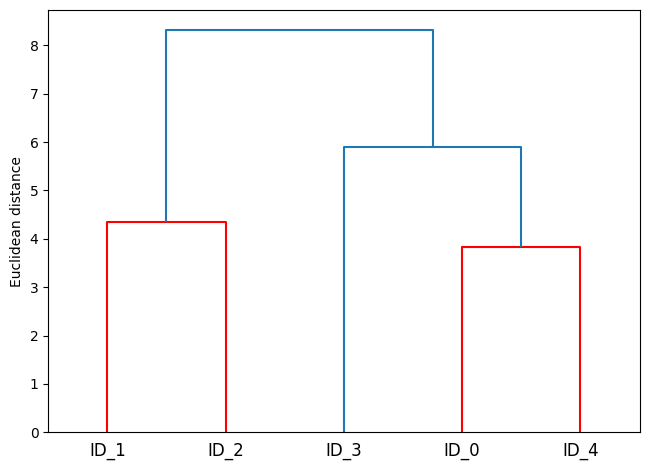

In [ ]:
from scipy.cluster.hierarchy import dendrogram

#make dendrogram black (part 1/2)
#from scipy.cluster.hierarchy import set_link_color_palette
#set_link_color_palette(['red'])

row_dendr = dendrogram(row_clusters,
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('figures/10_11.png', dpi=300,
#            bbox_inches='tight')
plt.show()

# Attaching dendrograms to a heat map

<ipython-input-98-5d73c97e1192>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
<ipython-input-98-5d73c97e1192>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


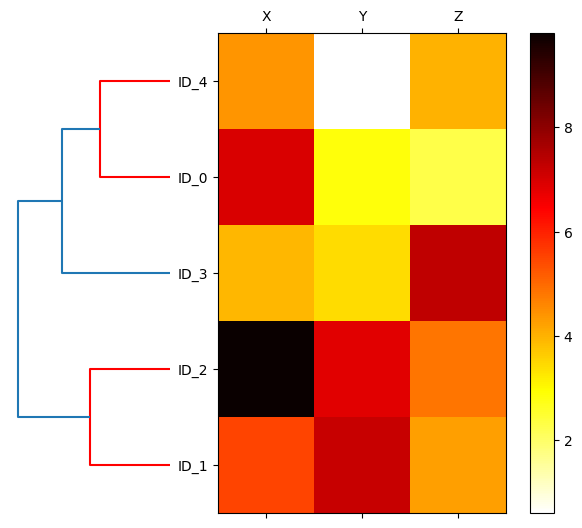

In [ ]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)

axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('figures/10_12.png', dpi=300)
plt.show()

# Applying agglomerative clustering via scikit-learn

In [ ]:
from sklearn.cluster import AgglomerativeClustering


ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [0 1 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# Locating regions of high density via DBSCAN

Although we can’t cover the vast number of different clustering algorithms in this chapter, let’s at
least include one more approach to clustering: density-based spatial clustering of applications with
noise (DBSCAN), which does not make assumptions about spherical clusters like k-means, nor does
it partition the dataset into hierarchies that require a manual cut-off point. As its name implies, density-based clustering assigns cluster labels based on dense regions of points. In DBSCAN, the notion
of density is defined as the number of points within a specified radius, 𝜀𝜀.
According to the DBSCAN algorithm, a special label is assigned to each example (data point) using
the following criteria:

• A point is considered a core point if at least a specified number (MinPts) of neighboring points
fall within the specified radius, 𝜀

• A border point is a point that has fewer neighbors than MinPts within 𝜀𝜀, but lies within the 𝜀
radius of a core point

• All other points that are neither core nor border points are considered noise points

After labeling the points as core, border, or noise, the DBSCAN algorithm can be summarized in two simple steps:

1. Form a separate cluster for each core point or connected group of core points. (Core points
are connected if they are no farther away than 𝜀.)

2. Assign each border point to the cluster of its corresponding core point.

To get a better understanding of what the result of DBSCAN can look like, before jumping to the implementation, let’s summarize what we have just learned about core points, border points, and noise points in Figure:

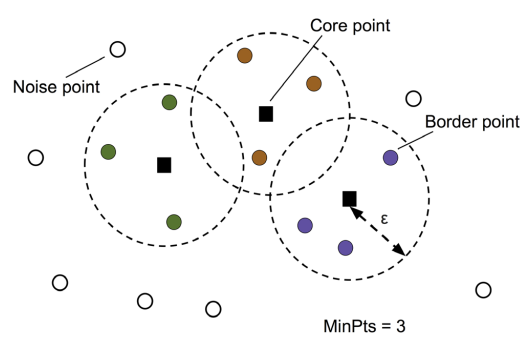


One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different from k-means and hierarchical clustering in that it doesn’t necessarily assign each point to a cluster but is capable of removing noise points.

For a more illustrative example, let’s create a new dataset of half-moon-shaped structures to compare k-means clustering, hierarchical clustering, and DBSCAN:

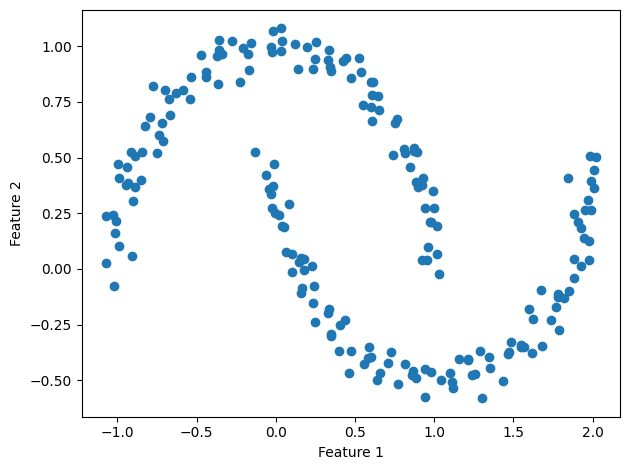

In [ ]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
#plt.savefig('figures/10_14.png', dpi=300)
plt.show()

As you can see in the resulting plot, there are two visible, half-moon-shaped groups consisting of 100
examples (data points) each.

# K-means and hierarchical clustering:

We will start by using the k-means algorithm and complete linkage clustering to see if one of those
previously discussed clustering algorithms can successfully identify the half-moon shapes as separate
clusters. The code is as follows:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


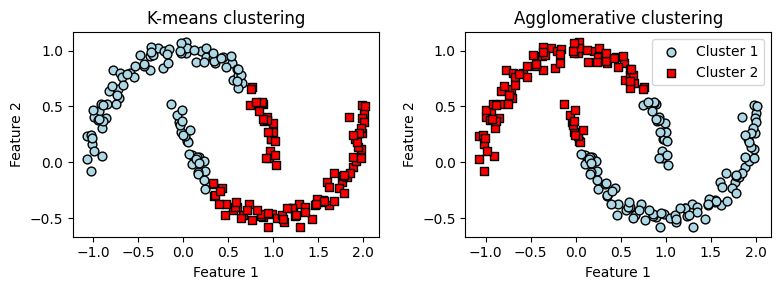

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.legend()
plt.tight_layout()
#plt.savefig('figures/10_15.png', dpi=300)
plt.show()

Based on the visualized clustering results, we can see that the k-means algorithm was unable to
separate the two clusters, and also, the hierarchical clustering algorithm was challenged by those
complex shapes.

# Density-based clustering:

Finally, let’s try the DBSCAN algorithm on this dataset to see if it can find the two half-moon-shaped
clusters using a density-based approach:

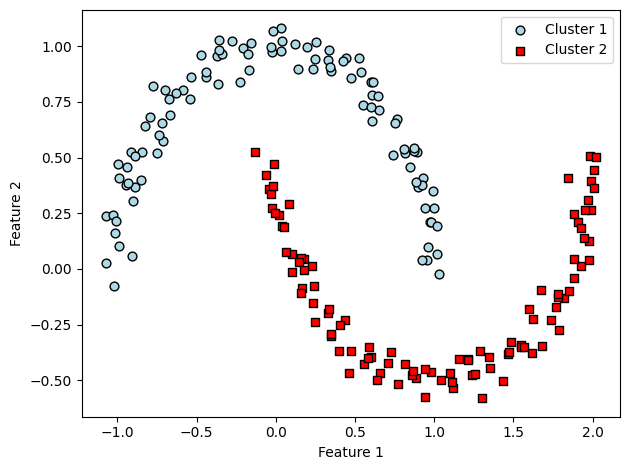

In [ ]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black',
            label='Cluster 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.tight_layout()
#plt.savefig('figures/10_16.png', dpi=300)
plt.show()

The DBSCAN algorithm can successfully detect the half-moon shapes, which highlights one of the
strengths of DBSCAN—clustering data of arbitrary shapes:

However, we should also note some of the disadvantages of DBSCAN. With an increasing number of features in our dataset—assuming a fixed number of training examples—the negative effect of the curse of dimensionality increases. This is especially a problem if we are using the Euclidean distance
metric. However, the problem of the curse of dimensionality is not unique to DBSCAN: it also affects other clustering algorithms that use the Euclidean distance metric, for example, k-means and hierarchical clustering algorithms. In addition, we have two hyperparameters in DBSCAN (MinPts and 𝜀)
that need to be optimized to yield good clustering results. Finding a good combination of MinPts and 𝜀𝜀 can be problematic if the density differences in the dataset are relatively large.

Note that, in practice, it is not always obvious which clustering algorithm will perform best on a given dataset, especially if the data comes in multiple dimensions that make it hard or impossible to visualize. Furthermore, it is important to emphasize that a successful clustering does not only depend on
the algorithm and its hyperparameters; rather, the choice of an appropriate distance metric and the use of domain knowledge that can help to guide the experimental setup can be even more important.